# Dealing with Categorical Variables - Lab

In [32]:
import numpy as np

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [6]:
# Your code here - load the dataset
import pandas as pd
ames1 = pd.read_csv('ames.csv', index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [7]:
# Your code here
ames1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [9]:
# Your code here - drop rows with missing data
ames1.dropna(axis=1, inplace=True)
ames1.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious! The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

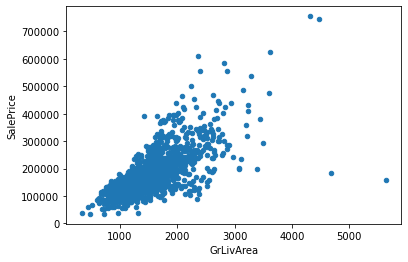

In [14]:
# Your code here - continuous numeric predictor
ames1.select_dtypes("number")
ames1.plot.scatter(x="GrLivArea", y="SalePrice");

### Discrete Numeric Predictor

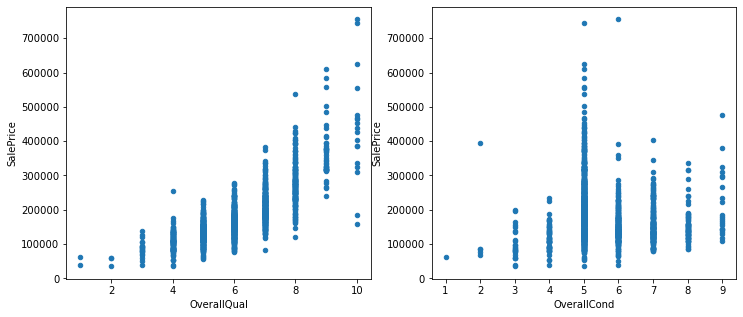

In [16]:
# Your code here - discrete numeric predictor
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ames1.plot.scatter(x="OverallQual", y="SalePrice", ax=ax1)
ames1.plot.scatter(x="OverallCond", y="SalePrice", ax=ax2);

### String Categorical Predictor

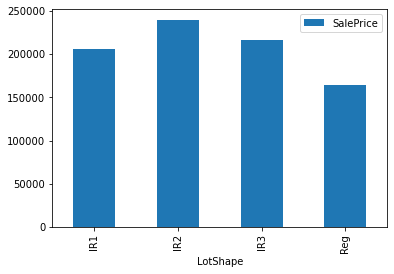

In [20]:
# Your code here - string categorical predictor
ames1.select_dtypes("object")
ames1.groupby('LotShape').mean('LotShape').sort_index().plot.bar(y='SalePrice');


### Discrete Categorical Predictor

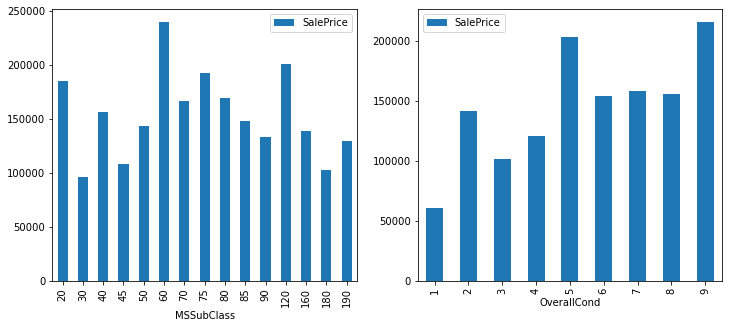

In [24]:
# Your code here - discrete categorical predictor
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ames1.groupby('MSSubClass').mean('MSSubClass').plot.bar(y='SalePrice', ax=ax1)
ames1.groupby('OverallCond').mean('OverallCond').plot.bar(y='SalePrice', ax=ax2);

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first!

In [35]:
# Your code here - prepare X and y, including one-hot encoding
y = ames1["SalePrice"]
X = ames1[["GrLivArea", "OverallQual", "LotShape"]]
X


,GrLivArea,OverallQual,LotShape
Id,,,
1,1710,7,Reg
2,1262,6,Reg
3,1786,7,IR1
4,1717,7,IR1
5,2198,8,IR1
...,...,...,...
1456,1647,6,Reg
1457,2073,6,Reg
1458,2340,7,Reg


In [28]:
# Your answer here - which category or categories were dropped?


In [36]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

In [28]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(2,3),
    fig=fig)
plt.tight_layout()
plt.show()

NameError: name 'results' is not defined

<Figure size 1080x720 with 0 Axes>

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [37]:
# Your code here - calculate an error-based metric
"""my code is not working, tried using the solution to figure it out still didn't work when
building the regression model"""

"my code is not working, tried using the solution to figure it out still didn't work when\nbuilding the regression model"

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [36]:
# Your answer here


## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [38]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.